In [ ]:
import matplotlib.pyplot as plt
import torch

In [ ]:
letter_X = torch.Tensor(10, 1, 20, 20)
letter_O = torch.Tensor(10, 1, 20, 20)
letter_U = torch.Tensor(10, 1, 20, 20)

In [ ]:
import random
center_x = 10
center_y = 10
def draw_line(matrix, point1, point2):
    # Bresenham algo FDF
    x1, y1 = point1
    x2, y2 = point2
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy
    while x1 != x2 or y1 != y2:
        matrix[y1, x1] = 255  # Set the pixel to 255 (white)
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
    return matrix

def generate_centered_X_image(size=20):
    image = torch.zeros((size, size), dtype=torch.uint8)
    start = random.randint(4, 8)
    end = random.randint(13, 17)
    image = draw_line(image, (start, start), (end, end))
    start = random.randint(4, 8)
    end = random.randint(13, 17)
    image = draw_line(image, (start, size-start), (end, size-end))
    return image

def generate_centered_O_image(size=20):
    image = torch.zeros((size, size), dtype=torch.uint8)
    x_length = random.randint(5, 13)
    y_length = random.randint(5, 13)
    corner1 = [center_x - int(x_length/2), center_y - int(y_length/2)]
    corner2 = [center_x + int(x_length/2), center_y + int(y_length/2)]
    min_row = min(corner1[0], corner2[0])
    max_row = max(corner1[0], corner2[0])
    min_col = min(corner1[1], corner2[1])
    max_col = max(corner1[1], corner2[1])
    for col in range(min_col+1, max_col):
        image[min_row][col] = 255  # Top edge
        image[max_row][col] = 255  # Bottom edge
    for row in range(min_row+1, max_row):
        image[row][min_col] = 255  # Left edge
        image[row][max_col] = 255  # Right edge
    return image

def generate_centered_U_image(size=20):
    image = torch.zeros((size, size), dtype=torch.uint8)
    x_length = random.randint(5, 13)
    y_length = random.randint(5, 13)
    corner1 = [center_x - int(x_length/2), center_y - int(y_length/2)]
    corner2 = [center_x + int(x_length/2), center_y + int(y_length/2)]
    min_row = min(corner1[0], corner2[0])
    max_row = max(corner1[0], corner2[0])
    min_col = min(corner1[1], corner2[1])
    max_col = max(corner1[1], corner2[1])
    for col in range(min_col+1, max_col):
        image[max_row][col] = 255  # Bottom edge
    for row in range(min_row+1, max_row):
        image[row][min_col] = 255  # Left edge
        image[row][max_col] = 255  # Right edge
    return image

In [ ]:
letter_X[:,0,:,:] = torch.stack([generate_centered_X_image() for _ in range(10)])
letter_O[:,0,:,:] = torch.stack([generate_centered_O_image() for _ in range(10)])
letter_U[:,0,:,:] = torch.stack([generate_centered_U_image() for _ in range(10)])

In [ ]:
from Lec7ImageStuff import PlotImages
images = torch.cat((letter_X, letter_O, letter_U), dim=0)
targets = torch.cat((torch.zeros(10), torch.ones(10), 2*torch.ones(10)))
images.shape

In [ ]:
img = PlotImages(images, targets)

In [1]:
from torchvision.transforms.functional import  rotate, vflip, hflip
from torchvision.transforms import Compose, ToTensor, RandomHorizontalFlip, RandomVerticalFlip, RandomRotation, ToPILImage
from torchvision import transforms

In [1]:
letter_X_aug = torch.Tensor(100, 1, 20, 20)
letter_O_aug = torch.Tensor(100, 1, 20, 20)
letter_U_aug = torch.Tensor(100, 1, 20, 20)
letter_U_aug[:10] = letter_U
letter_X_aug[:10] = letter_X
letter_O_aug[:10] = letter_O
for i in range(1, 10):
    available_transforms = [
    RandomVerticalFlip(1),
    RandomHorizontalFlip(1),
    RandomRotation(90)
]
    selected_transform = random.choice(available_transforms)
    """
    rand_transform = transforms.Compose([
        ToPILImage(),
        selected_transform(),
        ToTensor()])
    """
    print(selected_transform)
    letter_X_aug[i*10: (i+1)*10] = torch.cat([selected_transform(letter_X[j]) for j in range(10)], dim=0).unsqueeze(dim=1)
    letter_U_aug[i*10: (i+1)*10] = torch.cat([selected_transform(letter_U[j]) for j in range(10)], dim=0).unsqueeze(dim=1)
    letter_O_aug[i*10: (i+1)*10] = torch.cat([selected_transform(letter_O[j]) for j in range(10)], dim=0).unsqueeze(dim=1)

NameError: name 'torch' is not defined

In [ ]:
img = PlotImages(letter_X_aug, torch.ones(100), 100, 10)

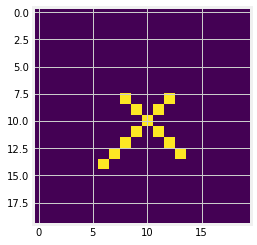

In [123]:
plt.imshow(letter_X_aug[1].squeeze(dim=0))


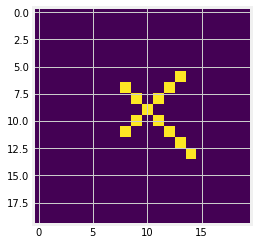

In [122]:
x_rot = transforms.functional.rotate(letter_X_aug[1], 90)
plt.imshow(x_rot.squeeze(dim=0))


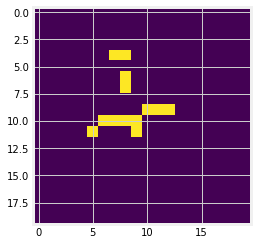

In [64]:
plt.imshow(letter_X_aug[11].squeeze(dim=0))